<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# for data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv")
# index columns setting
df.set_index('Cust_ID', inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [115]:
# 컬럼명, missing value, data type 확인
df.info()

#df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   30000 non-null  int64
 1   SEX         30000 non-null  int64
 2   EDUCATION   30000 non-null  int64
 3   MARRIAGE    30000 non-null  int64
 4   AGE         30000 non-null  int64
 5   PAY_0       30000 non-null  int64
 6   PAY_2       30000 non-null  int64
 7   PAY_3       30000 non-null  int64
 8   PAY_4       30000 non-null  int64
 9   PAY_5       30000 non-null  int64
 10  PAY_6       30000 non-null  int64
 11  BILL_AMT1   30000 non-null  int64
 12  BILL_AMT2   30000 non-null  int64
 13  BILL_AMT3   30000 non-null  int64
 14  BILL_AMT4   30000 non-null  int64
 15  BILL_AMT5   30000 non-null  int64
 16  BILL_AMT6   30000 non-null  int64
 17  PAY_AMT1    30000 non-null  int64
 18  PAY_AMT2    30000 non-null  int64
 19  PAY_AMT3    30000 non-null  int64
 20  PAY_AMT4    30000 non-null  

In [116]:
# Variable/Feature Selection (Not NULL / Not Missing)
label = 'default_YN'

# all features for model
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

0    0.7788
1    0.2212
Name: default_YN, dtype: float64
0    23364
1     6636
Name: default_YN, dtype: int64


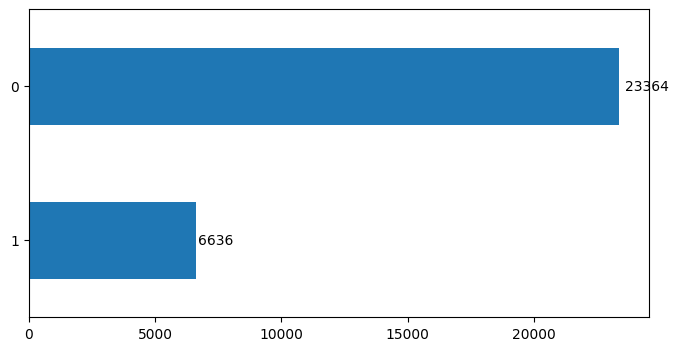

In [118]:
plt.figure(figsize=(8,4))

ax = df[label].value_counts(ascending=True).plot(kind='barh')
for p in ax.patches:
    x_axis, y_axis, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y_axis+height/2, "%.1d"%(width), va='center')

print(df.default_YN.value_counts(normalize=True))  # Target 비율
print(df.default_YN.value_counts())  # Target/NonTarget 수

### 학습(Train)/검증(Test) 데이터셋 분리

In [119]:
from sklearn.model_selection import train_test_split

# Train 70% Test 30%
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.3, random_state=12345)

## Modeling

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

### 1. 학습데이터(Train Data)를 이용하여 학습(Model fitting with train data set)

In [127]:
model_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

### 2. 예측 - 학습된 모델(fitted model)를 이용하여 Test 데이터셋의 결과값 예측(prediction)

In [128]:
# 예측 결과값(0,1)
predicted_result = model_dt.predict(X_test)
# 예측확률값(0~1)
predicted_probability = model_dt.predict_proba(X_test)
predicted_probability

array([[0.38271605, 0.61728395],
       [0.82408501, 0.17591499],
       [0.86235955, 0.13764045],
       ...,
       [0.9049332 , 0.0950668 ],
       [1.        , 0.        ],
       [0.82408501, 0.17591499]])

In [129]:
result1 = pd.Series(predicted_result, name='predicted_result', index=X_test.index)
result2 = pd.Series(predicted_probability[:,1], name='predicted_prob', index=X_test.index)
result_f = pd.concat([y_test, result1, result2], axis=1)

result_f.head(20)

,default_YN,predicted_result,predicted_prob
Cust_ID,,,
9821,0,1,0.617284
15393,1,0,0.175915
8068,0,0,0.137640
10145,0,0,0.156566
29875,1,0,0.095067
29542,0,0,0.436585
16867,0,0,0.142857
25277,0,0,0.053254
1031,0,0,0.000000


In [130]:
result_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 9821 to 17412
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   default_YN        9000 non-null   int64  
 1   predicted_result  9000 non-null   int64  
 2   predicted_prob    9000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 281.2 KB


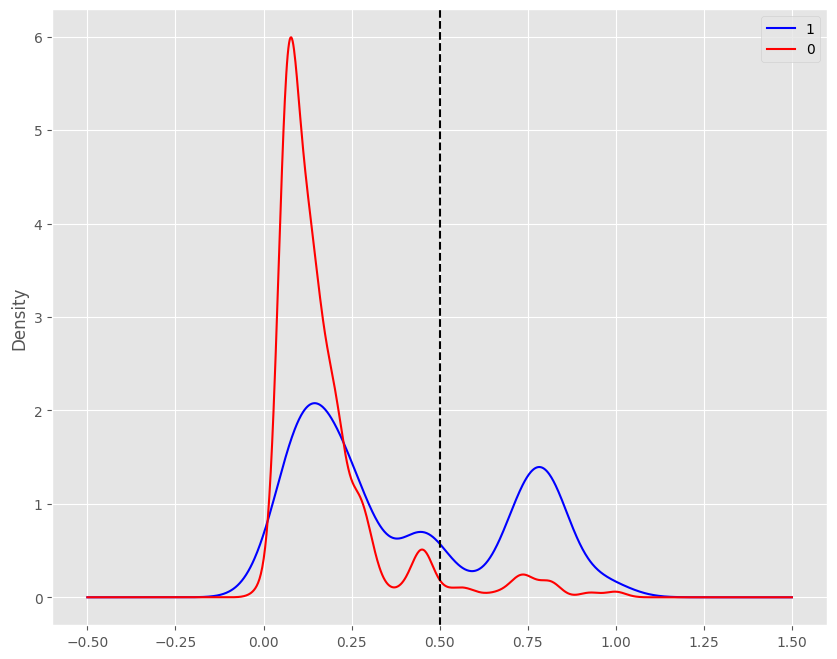

In [167]:
plt.figure(figsize=(10,8))
#plt.style.use('ggplot')

result.query('default_YN==1.0')['predicted_prob'].plot(kind='kde',color='blue', label='1')
result.query('default_YN==0.0')['predicted_prob'].plot(kind='kde',color='red',label='0')

#sns.histplot(data=result_f.query('default_YN==1')['predicted_prob'], stat='density', kde='True',bins=20, color='red', alpha=0.3, label='1')
#sns.histplot(data=result_f.query('default_YN==0')['predicted_prob'], stat='density', kde='True',bins=20, color='blue', alpha=0.3, label='0')

plt.axvline(0.5, linestyle ='--', color='black')

plt.legend()
plt.show()

In [139]:
from sklearn.metrics import confusion_matrix

0    7037
1    1963
Name: default_YN, dtype: int64
[[0.93576808 0.06423192]
 [0.64798777 0.35201223]]


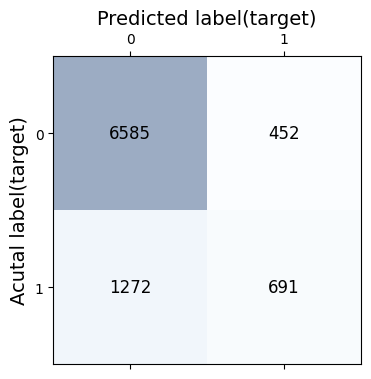

In [148]:
con_m = confusion_matrix(y_test, predicted_result, normalize=None)  # normalize=c('true','pred','all'), None

print(result_f['default_YN'].value_counts())
print(confusion_matrix(y_test, predicted_result, normalize='true'))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

In [149]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [151]:
print("Recall   : ", recall_score(y_test, predicted_result))
print("Precision: ", precision_score(y_test, predicted_result))
print("F1-Score  :", f1_score(y_test, predicted_result))

Recall   :  0.35201222618441164
Precision:  0.6045494313210849
F1-Score  : 0.4449452672247263


In [152]:
from sklearn.metrics import precision_recall_curve

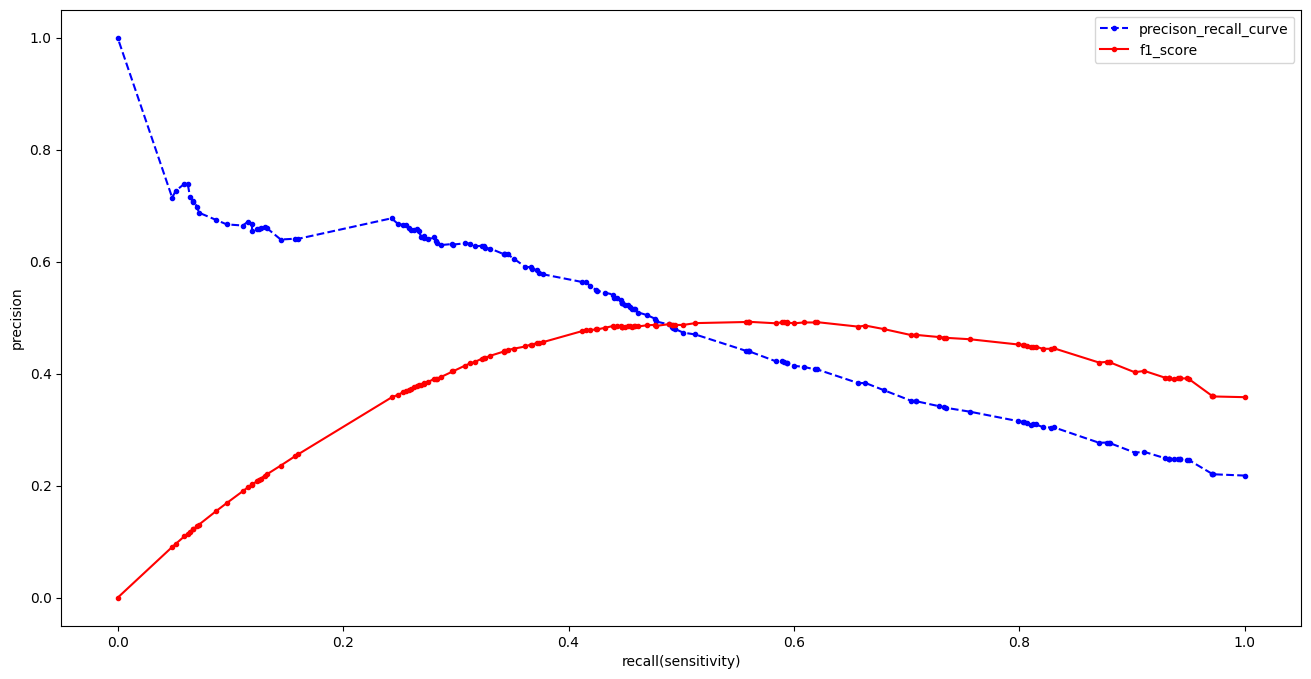

In [158]:
model_precision, model_recall, threshold = precision_recall_curve(y_test, result_f['predicted_prob'])

plt.figure(figsize=(16,8))
plt.plot(model_recall, model_precision, color='blue', marker='.', linestyle='dashed',label='precison_recall_curve')
plt.plot(model_recall, 2*(model_recall * model_precision/(model_recall + model_precision)), color='red', marker='.',label='f1_score')

plt.xlabel('recall(sensitivity)')
plt.ylabel('precision')
plt.legend()
plt.show()

## ROC curve

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [160]:
# Baseline setting
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_= roc_curve(y_test, ns_probs)

In [161]:
mdl_fpr,mdl_tpr,threshold=roc_curve(y_test, predicted_probability[:,1])

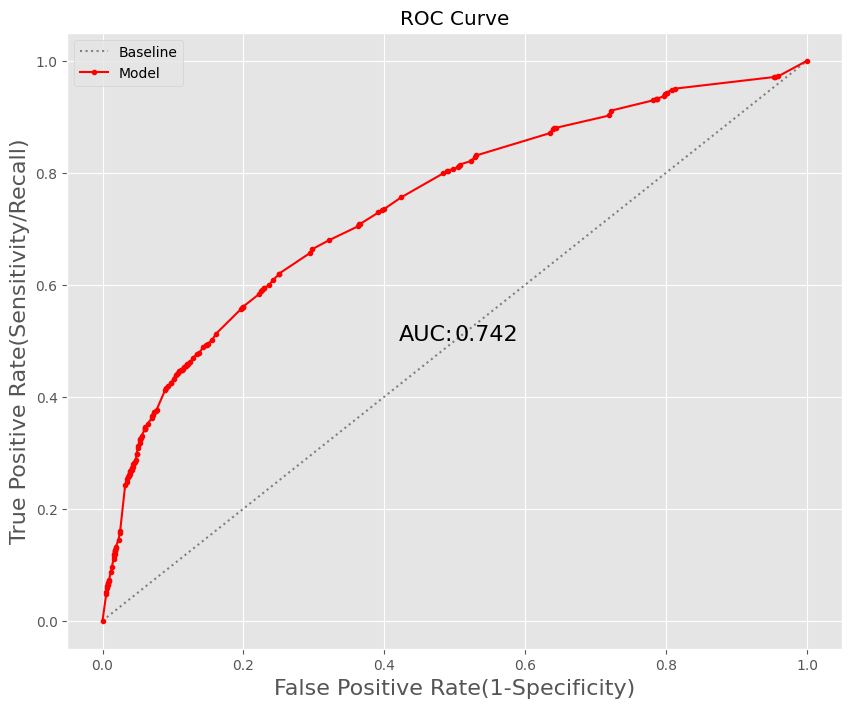

In [166]:
plt.figure(figsize=(10,8))
plt.title("ROC Curve")
plt.plot(ns_fpr, ns_tpr,linestyle=':',color='gray', label='Baseline')
plt.plot(mdl_fpr, mdl_tpr,marker='.', color='red',label='Model')

plt.text(0.5, 0.5, np.round(roc_auc_score(y_test, predicted_probability[:,1]),3), fontsize=16)
plt.text(0.42, 0.5, "AUC:", fontsize=16)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=16)
plt.ylabel('True Positive Rate(Sensitivity/Recall)', fontsize=16)

plt.legend()
plt.show()